# Updating Kontext with mask images

In [2]:
import torch
from diffusers import FluxKontextInpaintPipeline
from diffusers.utils import load_image

# Set CUDA device to GPU 0
device = torch.device("cuda:0")

pipe = FluxKontextInpaintPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-Kontext-dev",
    torch_dtype=torch.bfloat16
)
pipe.to(device)


Loading checkpoint shards: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 62.41it/s]
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 17.04it/s]


FluxKontextInpaintPipeline {
  "_class_name": "FluxKontextInpaintPipeline",
  "_diffusers_version": "0.35.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-Kontext-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
!pip install pynvml


In [5]:
import pynvml
pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)  # GPU 0
info = pynvml.nvmlDeviceGetMemoryInfo(handle)
print(f"GPU 0 memory used: {info.used / 1024**2:.2f} MB")


GPU 0 memory used: 33200.00 MB


In [6]:
# Memory allocated by PyTorch
print(f"Allocated memory: {torch.cuda.memory_allocated(0) / 1e6:.2f} MB")
print(f"Reserved memory: {torch.cuda.memory_reserved(0) / 1e6:.2f} MB")


Allocated memory: 33755.80 MB
Reserved memory: 33766.24 MB


In [18]:
import time
from diffusers.utils import load_image
from PIL import Image

# Load your images
image = load_image("input_data/4.png")         # RGB image
mask  = load_image("input_data/4_mask_text.png").convert("L")  # Grayscale mask

# Get dimensions
width, height = image.size
mask_width, mask_height = mask.size

# Print sizes
print(f"Image size: {width}x{height}")
print(f"Mask size: {mask_width}x{mask_height}")

# Define prompt
prompt = "Replace only the text 'CALZADO' for 'ROPA' "

# Measure time
start_time = time.time()

# Run inpainting
result = pipe(
    prompt=prompt,
    image=image,
    mask_image=mask,
    guidance_scale=5,
    width=width,
    height=height,
    num_inference_steps=40
).images[0]

end_time = time.time()
elapsed = end_time - start_time
print(f"Inpainting took: {elapsed:.2f} seconds")

# Resize the result back to the original input image size
print(f"Result size: {result.size}")
result_resized = result.resize(image.size, Image.LANCZOS)

# Optional: Show or save
print(f"Final result size: {result_resized.size}")
result_resized.save("input_data/4_output_resized.png")


Generation `height` and `width` have been adjusted to 528 and 1952 to fit the model requirements.


Image size: 1920x528
Mask size: 1920x528


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:19<00:00,  2.04it/s]


Inpainting took: 20.04 seconds
Result size: (1568, 672)
Final result size: (1920, 528)


In [13]:
# GPU memory used
#36569MiB /  81559MiB


(1920, 528)


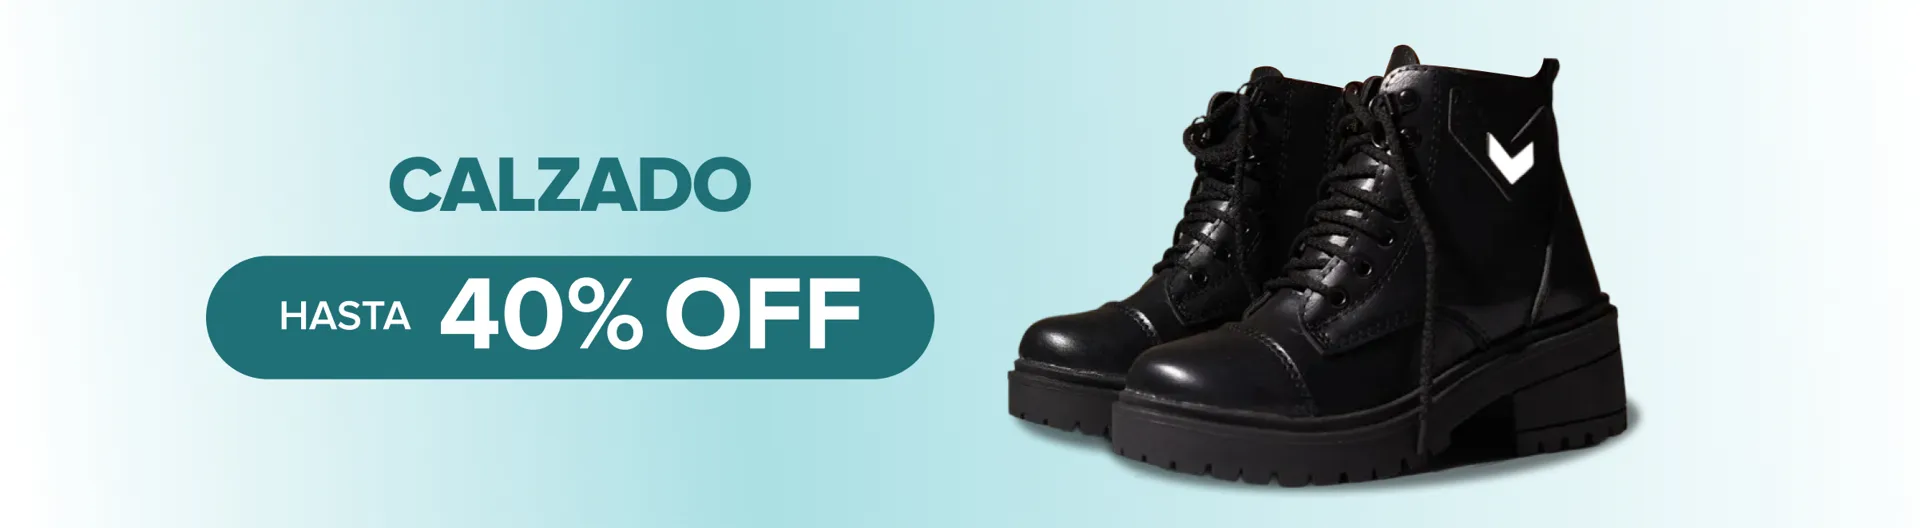

In [19]:
print(image.size)
image


(1920, 528)


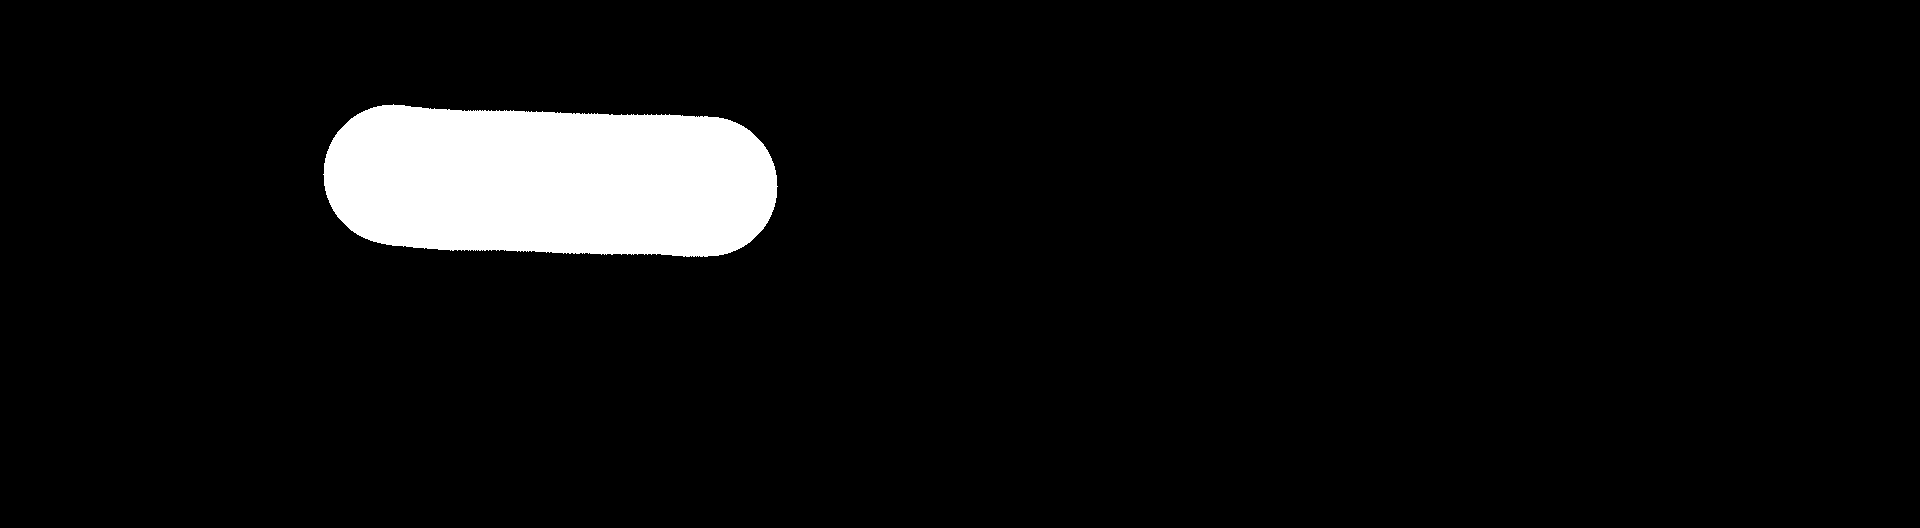

In [20]:
print(mask.size)
mask

(1920, 528)


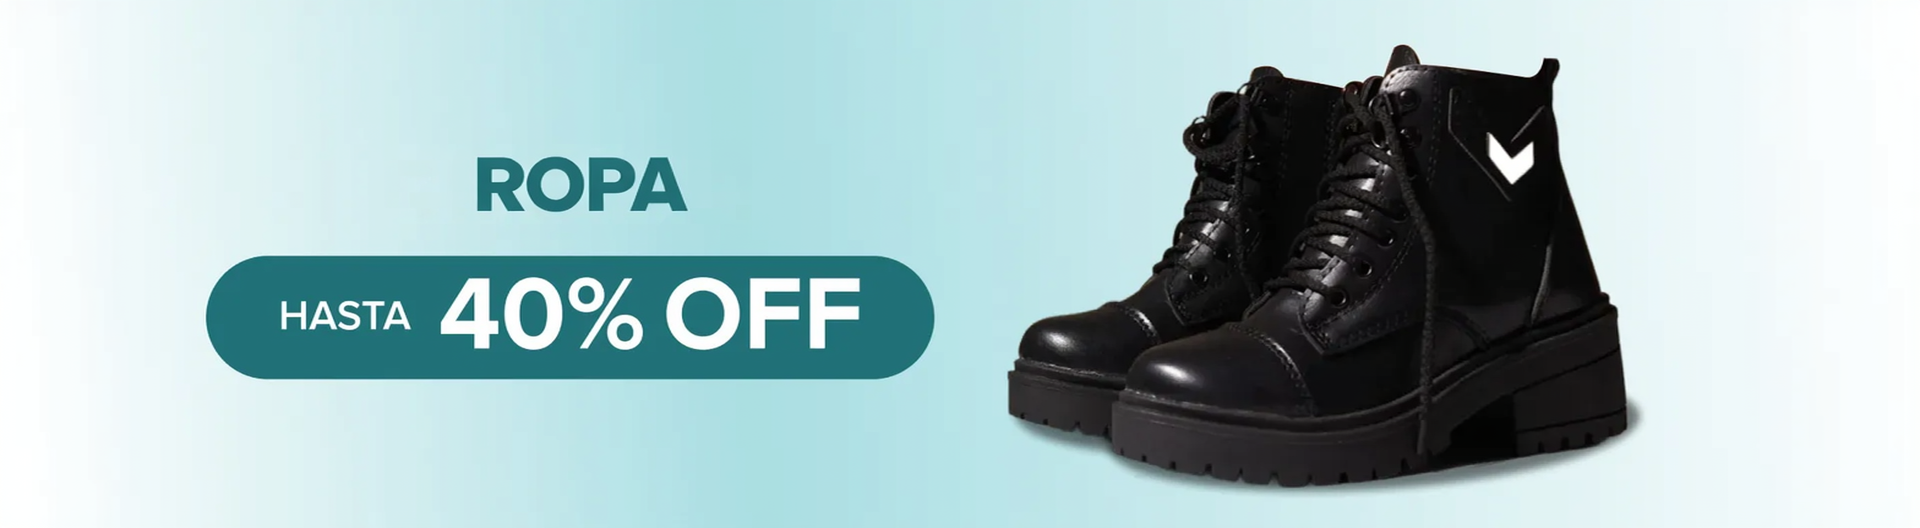

In [21]:
print (result_resized.size)
result_resized
